In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ride_df = pd.read_csv("ride_data.csv")
city_df = pd.read_csv("city_data.csv")
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Check if any rows are blank
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#Make sure driver_count column is int type
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# How many data points for each type of city 
city_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(city_df["type"] == "Urban")

66

In [9]:
sum(city_df["type"] == "Suburban")

36

In [10]:
sum(city_df["type"] == "Rural")

18

In [11]:
# See if any rows null using a diff method 
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_df, city_df, how = 'left', on = ['city', 'city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# Create the Urban city dataframe 
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

In [15]:
# Create the Suburban and Rural city dataframe 
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df.head()


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
# Get number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
# Create the suburban and rural ride count 
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [18]:
# Get average fare for each city 

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [19]:
# Get average number of drivers for each city 
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

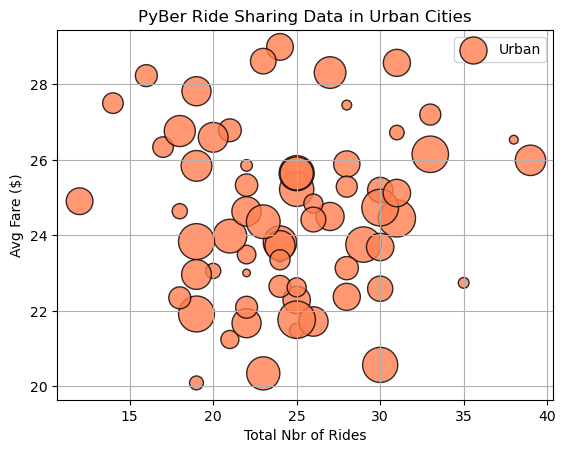

In [20]:
# Build scatter plot for urban cities using matlab method
plt.scatter(
    urban_ride_count, 
    urban_avg_fare, 
    label = "Urban", 
    s = urban_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'coral', 
    linewidths= 1)
plt.title("PyBer Ride Sharing Data in Urban Cities")
plt.xlabel("Total Nbr of Rides")
plt.ylabel("Avg Fare ($)")
plt.legend()
plt.grid()

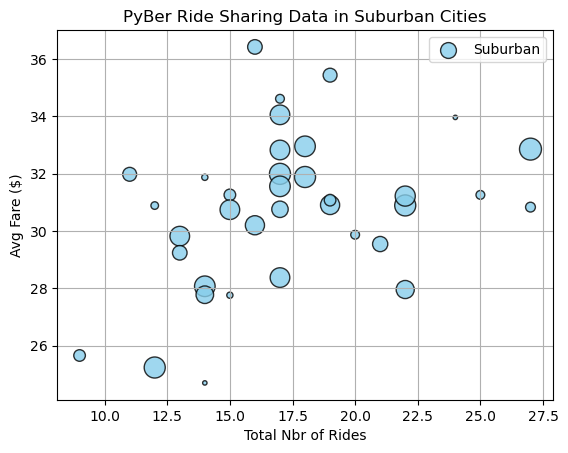

In [21]:
# Build scatter plot for suburban cities using matlab method
plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare, 
    label = "Suburban", 
    s = suburban_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'skyblue', 
    linewidths= 1)
plt.title("PyBer Ride Sharing Data in Suburban Cities")
plt.xlabel("Total Nbr of Rides")
plt.ylabel("Avg Fare ($)")
plt.legend()
plt.grid()

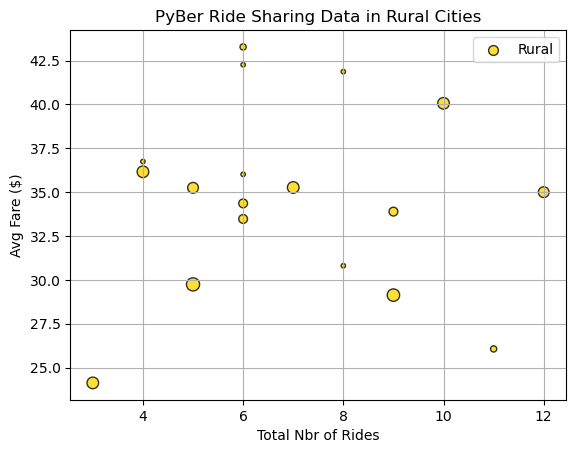

In [22]:
# Build scatter plot for rural cities using matlab method
plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    label = "Rural", 
    s = rural_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'gold', 
    linewidths= 1)
plt.title("PyBer Ride Sharing Data in Rural Cities")
plt.xlabel("Total Nbr of Rides")
plt.ylabel("Avg Fare ($)")
plt.legend()
plt.grid()

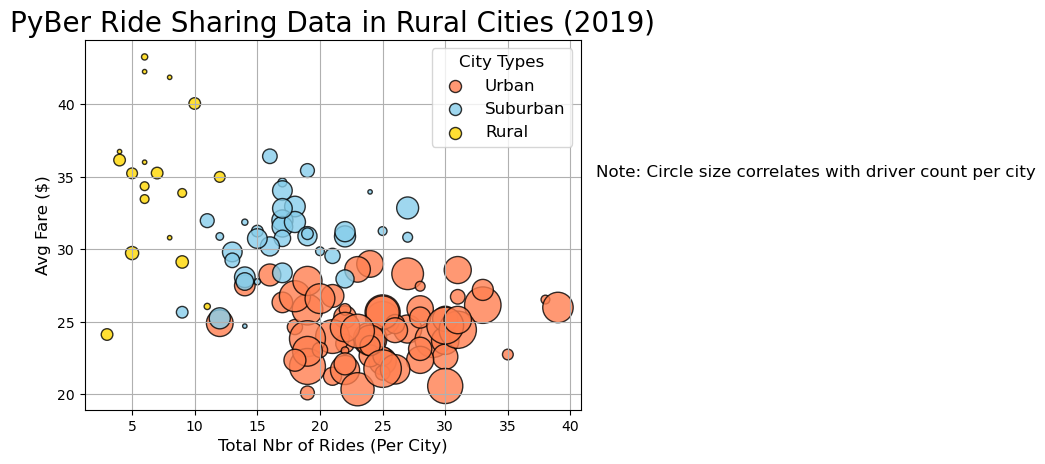

In [23]:
# Combine individual graphs into one 
plt.scatter(
    urban_ride_count, 
    urban_avg_fare, 
    label = "Urban", 
    s = urban_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'coral', 
    linewidths= 1)

plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare, 
    label = "Suburban", 
    s = suburban_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'skyblue', 
    linewidths= 1)

plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    label = "Rural", 
    s = rural_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'gold', 
    linewidths= 1)

plt.title("PyBer Ride Sharing Data in Rural Cities (2019)", fontsize = 20)
plt.xlabel("Total Nbr of Rides (Per City)", fontsize = 12)
plt.ylabel("Avg Fare ($)", fontsize = 12)
plt.grid()

# Format legend 
lgnd = plt.legend(fontsize = 12, mode = 'Expanded', scatterpoints = 1, loc = 'best', title = 'City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add text label about circle size 
plt.text(42,35, "Note: Circle size correlates with driver count per city", fontsize = 12)

plt.savefig("../Analysis/Fig1.png")